<a href="https://colab.research.google.com/github/june1st/GoogleColab/blob/master/DensePoseOnGoogleColab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DensePoseTest

<table class="tfo-notebook-buttons" align="left" >
 <td>
<img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
  <td>
<img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
  </td>
</table>


In [1]:
!pip install torch

# 環境構築
出力が長すぎるときは適宜 > /dev/null してください

## CUDAの差替え（9.2 → 9.0）

In [2]:
#現在のCUDAの確認（スクリプト作成時点で9.2）
!python -c 'import chainer; chainer.print_runtime_info()'

Platform: Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic
Chainer: 5.0.0
NumPy: 1.14.6
CuPy:
  CuPy Version          : 5.2.0
  CUDA Root             : /usr/local/cuda
  CUDA Build Version    : 10000
  CUDA Driver Version   : 10000
  CUDA Runtime Version  : 10000
  cuDNN Build Version   : 7301
  cuDNN Version         : 7301
  NCCL Build Version    : 2307
iDeep: 2.0.0.post3


In [3]:
#CUDA9.0のダウンロードとインストール
!wget http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_9.0.176-1_amd64.deb
!dpkg -i --force-confnew cuda-repo-ubuntu1604_9.0.176-1_amd64.deb
!apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-9-0 > /dev/null
!echo done

--2019-02-10 13:44:33--  http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_9.0.176-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.211.70, 2606:2800:21f:3aa:dcf:37b:1ed6:1fb
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.211.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2838 (2.8K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1604_9.0.176-1_amd64.deb’

cuda-repo-ubuntu160 100%[===================>]   2.77K  --.-KB/s    in 0s      

2019-02-10 13:44:33 (528 MB/s) - ‘cuda-repo-ubuntu1604_9.0.176-1_amd64.deb’ saved [2838/2838]

Selecting previously unselected package cuda-repo-ubuntu1604.
(Reading database ... 113597 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604_9.0.176-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1604 (9.0.176-1) ...
Setting up cuda-repo-ubuntu1604 (9.0.176-1) ...

Configurati

In [4]:
# CUDA9.0が入ったか確認
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


## 依存ライブラリのインストール

In [5]:
  !apt install libprotobuf-dev libleveldb-dev libsnappy-dev libopencv-dev libhdf5-serial-dev protobuf-compiler
  !apt install --no-install-recommends libboost-all-dev
  !apt install libopenblas-dev
  !apt install libgflags-dev libgoogle-glog-dev liblmdb-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
Suggested packages:
  leveldb-doc
The following NEW packages will be installed:
  libhdf5-serial-dev libleveldb-dev libleveldb1v5 libprotobuf-dev
  libprotobuf-lite10 libsnappy-dev
0 upgraded, 6 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,400 kB of archives.
After this operation, 9,964 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libhdf5-serial-dev all 1.10.0-patch1+docs-4 [2,898 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libleveldb1v5 amd64 1.20-2 [136 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libleveldb-dev amd64 1.20-2 [177 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libprotobuf-lite10 amd64 3.0.0-9.1ubuntu1 [97.7 kB]
Get:5 h

In [6]:
# libhdf5のシンボリックリンク作成（バージョン変わったらlsで確認してください）
!ls /usr/lib/x86_64-linux-gnu/libhdf5_serial*
# 念のため先に unlink しておく
!unlink /usr/lib/x86_64-linux-gnu/libhdf5.so
!unlink /usr/lib/x86_64-linux-gnu/libhdf5_hl.so
!sudo ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial.so.100.0.1 /usr/lib/x86_64-linux-gnu/libhdf5.so
!sudo ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so.100.0.0 /usr/lib/x86_64-linux-gnu/libhdf5_hl.so

/usr/lib/x86_64-linux-gnu/libhdf5_serial.a
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.a
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.so
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serial_fortran.so.100.0.1
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.a
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.a
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.so
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serialhl_fortran.so.100.0.0
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so.100.0.0
/usr/lib/x86_64-linux-gnu/libhdf5_serial.settings
/usr/lib/x86_64-linux-gnu/libhdf5_serial.so
/usr/lib/x86_64-linux-gnu/libhdf5_serial.so.100
/usr/lib/x86_64-linux-gnu/libhdf5_serial.so.100.0.1
unlink: cannot unlink '/usr/lib/x86_64-linux-gnu/libhdf5.so': No such file or directory
unlink: cannot unlink '/usr/li

In [7]:
# gcc-6未満のバージョンをインストール
!add-apt-repository -y ppa:ubuntu-toolchain-r/test
!apt update
#!apt-get install gcc-4.8 g++-4.8
!apt-get install gcc-5 g++-5
# 使用するgccの選択
#!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-4.8 48 --slave /usr/bin/g++ g++ /usr/bin/g++-4.8 --slave /usr/bin/gcov gcov /usr/bin/gcov-4.8
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 50 --slave /usr/bin/g++ g++ /usr/bin/g++-5 --slave /usr/bin/gcov gcov /usr/bin/gcov-5
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-7 70 --slave /usr/bin/g++ g++ /usr/bin/g++-7 --slave /usr/bin/gcov gcov /usr/bin/gcov-7
# 使用可能なgccの確認
!update-alternatives --list gcc
#!update-alternatives --config gcc
!update-alternatives --set gcc /usr/bin/gcc-5
!gcc -v

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Hit:4 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:11 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease [15.4 kB]
Get:14 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic/main amd64 Packages [1,845 B]
Fetched 17.2 kB in 

In [8]:
# Boostのダウンロード
#%cd /content/caffe
!wget https://dl.bintray.com/boostorg/release/1.67.0/source/boost_1_67_0.tar.bz2
!tar --bzip2 -xf boost_1_67_0.tar.bz2

--2019-02-10 13:48:19--  https://dl.bintray.com/boostorg/release/1.67.0/source/boost_1_67_0.tar.bz2
Resolving dl.bintray.com (dl.bintray.com)... 52.35.172.195, 52.34.114.104
Connecting to dl.bintray.com (dl.bintray.com)|52.35.172.195|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://d29vzk4ow07wi7.cloudfront.net/2684c972994ee57fc5632e03bf044746f6eb45d4920c343937a465fd67a5adba?response-content-disposition=attachment%3Bfilename%3D%22boost_1_67_0.tar.bz2%22&Policy=eyJTdGF0ZW1lbnQiOiBbeyJSZXNvdXJjZSI6Imh0dHAqOi8vZDI5dnprNG93MDd3aTcuY2xvdWRmcm9udC5uZXQvMjY4NGM5NzI5OTRlZTU3ZmM1NjMyZTAzYmYwNDQ3NDZmNmViNDVkNDkyMGMzNDM5MzdhNDY1ZmQ2N2E1YWRiYT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPWF0dGFjaG1lbnQlM0JmaWxlbmFtZSUzRCUyMmJvb3N0XzFfNjdfMC50YXIuYnoyJTIyIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNTQ5ODA3MjE5fSwiSXBBZGRyZXNzIjp7IkFXUzpTb3VyY2VJcCI6IjAuMC4wLjAvMCJ9fX1dfQ__&Signature=hsgBXLZ2eOO5gCQbTWFLQftigHznCUN-qTKq5V3w-g4J1fMK4rhEzuCH7hPuIPmrGyTwaBH

In [9]:
# Boostのインストール
!cd boost_1_67_0 && ./bootstrap.sh --exec-prefix=/usr/local --with-libraries=system,filesystem,regex,thread,python \
--with-python-version=2.7 --with-python-root=/usr
!cd boost_1_67_0 && ./b2 install > /dev/null
!echo done

Building Boost.Build engine with toolset gcc... tools/build/src/engine/bin.linuxx86_64/b2
Unicode/ICU support for Boost.Regex?... /usr
Generating Boost.Build configuration in project-config.jam...

Bootstrapping is done. To build, run:

    ./b2
    
To adjust configuration, edit 'project-config.jam'.
Further information:

   - Command line help:
     ./b2 --help
     
   - Getting started guide: 
     http://www.boost.org/more/getting_started/unix-variants.html
     
   - Boost.Build documentation:
     http://www.boost.org/build/doc/html/index.html

done


In [10]:
!pwd

/content


# Caffeのインストール

In [11]:
!git clone https://github.com/BVLC/caffe

Cloning into 'caffe'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 64876 (delta 0), reused 0 (delta 0), pack-reused 64875
Receiving objects: 100% (64876/64876), 70.21 MiB | 21.32 MiB/s, done.
Resolving deltas: 100% (41102/41102), done.


In [12]:
%cd caffe

/content/caffe


In [0]:
# インストールスクリプトの修正
with open('Makefile.config.example') as f:
  config = f.read()
  
comment = ['CUDA_DIR := /usr/local/cuda', 
           'BLAS := open']
uncomment = ['# CUDA_DIR := /usr', 
             '# BLAS := atlas', 
             '# OPENCV_VERSION := 3', '# WITH_PYTHON_LAYER := 1'] #
replace = [('INCLUDE_DIRS := $(PYTHON_INCLUDE) /usr/local/include',
            'INCLUDE_DIRS := $(PYTHON_INCLUDE) /usr/local/include /usr/include/hdf5/serial /usr/local/lib/python2.7/dist-packages/numpy/core/include/'), 
           ('LIBRARY_DIRS := $(PYTHON_LIB) /usr/local/lib /usr/lib',
            'LIBRARY_DIRS := $(PYTHON_LIB) /usr/local/lib /usr/lib /usr/lib/x86_64-linux-gnu/hdf5/serial')]

for c in uncomment:
  config = config.replace(c, c[2:])
for c in comment:
  config = config.replace(c, '# '+c)
for c1,c2 in replace:
  config = config.replace(c1, c2)
  
with open('Makefile.config', 'w') as f:
  f.write(config)

In [0]:
# MakefileのCUDA_ARCH
# https://kusanohitoshi.blogspot.com/2017/02/caffe.html
#!cat Makefile.config
###################################################
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('CUDA_ARCH := -gencode arch=compute_20,code=sm_20 \\',
                      'CUDA_ARCH := \#-gencode arch=compute_20,code=sm_20 \\'))
###################################################
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('		-gencode arch=compute_20,code=sm_21',
                      '#		-gencode arch=compute_20,code=sm_21'))

In [0]:
##https://qiita.com/yoyoyo_/items/ed723a6e81c1f4046241
##BLAS関係の修正
#BLAS_INCLUDE := /usr/local/cuda/targets/x86_64-linux/include
#BLAS_LIB := /usr/local/cuda/targets/x86_64-linux/lib
#!cat Makefile.config
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('# BLAS_INCLUDE := /path/to/your/blas',
                      'BLAS_INCLUDE := /usr/local/cuda/targets/x86_64-linux/include'))
with open('./Makefile.config') as f:
  txt = f.read()
with open('./Makefile.config', 'w') as f:
  f.write(txt.replace('# BLAS_LIB := /path/to/your/blas',
                      'BLAS_LIB := /usr/local/cuda/targets/x86_64-linux/lib'))

In [16]:
!cat Makefile.config

## Refer to http://caffe.berkeleyvision.org/installation.html
# Contributions simplifying and improving our build system are welcome!

# cuDNN acceleration switch (uncomment to build with cuDNN).
# USE_CUDNN := 1

# CPU-only switch (uncomment to build without GPU support).
# CPU_ONLY := 1

# uncomment to disable IO dependencies and corresponding data layers
# USE_OPENCV := 0
# USE_LEVELDB := 0
# USE_LMDB := 0
# This code is taken from https://github.com/sh1r0/caffe-android-lib
# USE_HDF5 := 0

# uncomment to allow MDB_NOLOCK when reading LMDB files (only if necessary)
#	You should not set this flag if you will be reading LMDBs with any
#	possibility of simultaneous read and write
# ALLOW_LMDB_NOLOCK := 1

# Uncomment if you're using OpenCV 3
OPENCV_VERSION := 3

# To customize your choice of compiler, uncomment and set the following.
# N.B. the default for Linux is g++ and the default for OSX is clang++
# CUSTOM_CXX := g++

# CUDA directory contains bin/ and lib/ directories that we ne

In [17]:
!pwd

/content/caffe


In [18]:
!mkdir build
%cd build
!cmake ..
!cmake --build .

/content/caffe/build
-- The C compiler identification is GNU 5.5.0
-- The CXX compiler identification is GNU 5.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Boost version: 1.67.0
-- Found the follow

In [0]:
#!make

In [20]:
!ls

CaffeConfig.cmake   CMakeCache.txt	  docs	       lib	 src
caffe_config.h	    CMakeFiles		  examples     Makefile  test
CaffeTargets.cmake  cmake_install.cmake   include      matlab	 tools
cmake		    detect_cuda_archs.cu  __init__.py  python


In [21]:
!python -c 'from caffe2.python import core' 2>/dev/null && echo "Success" || echo "Failure"

Success


# Denseposeのインストール

In [22]:
#Detectron
%cd /content
!git clone https://github.com/facebookresearch/detectron
%cd /content/detectron
!pip install -r ./requirements.txt
!make
!python ./detectron/tests/test_spatial_narrow_as_op.py

/content
Cloning into 'detectron'...
remote: Enumerating objects: 1279, done.
remote: Total 1279 (delta 0), reused 0 (delta 0), pack-reused 1279
Receiving objects: 100% (1279/1279), 4.22 MiB | 19.04 MiB/s, done.
Resolving deltas: 100% (823/823), done.
/content/detectron
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later rele

In [23]:
#Detectronからlibcaffe2_detectron_ops_gpu.soを抽出
!cp /usr/local/lib/python2.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so /content/libcaffe2_detectron_ops_gpu.so
!pip uninstall -y detectron

Uninstalling Detectron-0.0.0:
  Successfully uninstalled Detectron-0.0.0


In [24]:
#Densepose
%cd /content
!git clone https://github.com/facebookresearch/densepose
!pip install -r densepose/requirements.txt
%cd /content/densepose
!make

/content
Cloning into 'densepose'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 1251 (delta 13), reused 12 (delta 6), pack-reused 1215
Receiving objects: 100% (1251/1251), 11.99 MiB | 35.18 MiB/s, done.
Resolving deltas: 100% (775/775), done.
    100% |████████████████████████████████| 40kB 3.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/f0/ff/63/fdbff3f1e1b76ad4eae491dd5b190902906b093e93eb86dd5a
Successfully built memory-profiler
/content/densepose
python2 setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/densepose/detectron/utils/c

In [0]:
#Detectronから抽出したlibcaffe2_detectron_ops_gpu.soに差し替え
!cp /content/libcaffe2_detectron_ops_gpu.so  /usr/local/lib/

In [26]:
#インストールの確認
!python ./detectron/tests/test_spatial_narrow_as_op.py

[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
Found Detectron ops lib: /usr/local/lib/libcaffe2_detectron_ops_gpu.so
...
----------------------------------------------------------------------
Ran 3 tests in 3.654s

OK


In [27]:
%cd ./DensePoseData
!bash get_densepose_uv.sh
!bash get_eval_data.sh

/content/densepose/DensePoseData
--2019-02-10 14:04:55--  https://dl.fbaipublicfiles.com/densepose/densepose_uv_data.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22743040 (22M) [application/x-tar]
Saving to: ‘densepose_uv_data.tar.gz’

densepose_uv_data.t 100%[===================>]  21.69M   142MB/s    in 0.2s    

2019-02-10 14:04:55 (142 MB/s) - ‘densepose_uv_data.tar.gz’ saved [22743040/22743040]

UV_Processed.mat
UV_symmetry_transforms.mat
--2019-02-10 14:04:56--  https://dl.fbaipublicfiles.com/densepose/densepose_eval_data.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request s

# Denseposeの実行

In [28]:
%cd /content/densepose

/content/densepose


In [36]:
!python tools/infer_simple.py \
    --cfg configs/DensePose_ResNet101_FPN_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl \
    DensePoseData/demo_data/demo_im.jpg

Found Detectron ops lib: /usr/local/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py:  57: Downloading remote file https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl to /tmp/detectron-download-cache/DensePose_ResNet101_FPN_s1x-e2e.pkl
  [============================================================] 100.0% of 607.9MB file  
WARNING cnn.py:  25: [====DEPRECATE WARNING====]: you are creating an object from CNNModelHelper class which will be deprec

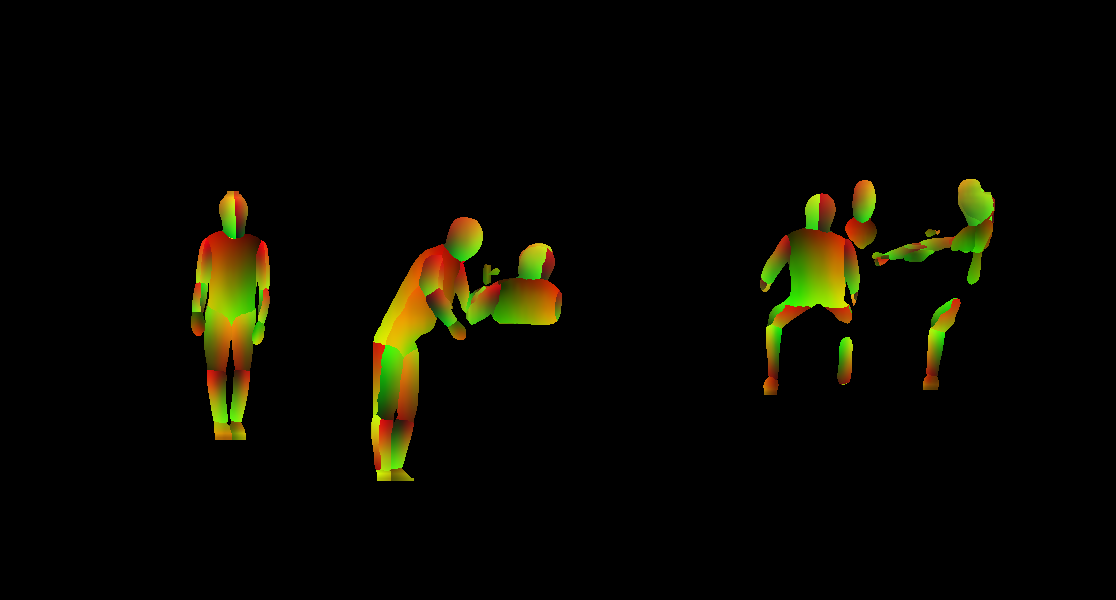

In [37]:
from IPython.display import Image,display_png
display_png(Image('DensePoseData/infer_out/demo_im_IUV.png'))

env: WEB_IMAGE=https://cdn-image.as-web.jp/2016/09/20125954/011010-764x510.jpg
env: WEB_IMAGE=https://www.aviationwire.jp/wp-content/uploads/2018/06/180606_b0315_hj-640.jpg
env: WEB_IMAGE=https://images-na.ssl-images-amazon.com/images/I/61b151Q6PcL._SX342_.jpg
env: WEB_IMAGE=https://images-na.ssl-images-amazon.com/images/I/51ZyXmFJvlL._SY450_.jpg
env: WEB_IMAGE=http://img.phoenix.webcrew.co.jp/4160/cont_images/facet_content_cn/97/column-20151225-1.jpg
--2019-02-10 14:21:56--  http://img.phoenix.webcrew.co.jp/4160/cont_images/facet_content_cn/97/column-20151225-1.jpg
Resolving img.phoenix.webcrew.co.jp (img.phoenix.webcrew.co.jp)... 211.14.145.245
Connecting to img.phoenix.webcrew.co.jp (img.phoenix.webcrew.co.jp)|211.14.145.245|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202508 (198K) [image/jpeg]
Saving to: ‘DensePoseData/demo_data/webimage.jpg’

DensePoseData/demo_ 100%[===================>] 197.76K   254KB/s    in 0.8s    

2019-02-10 14:21:58 (254 KB/s)

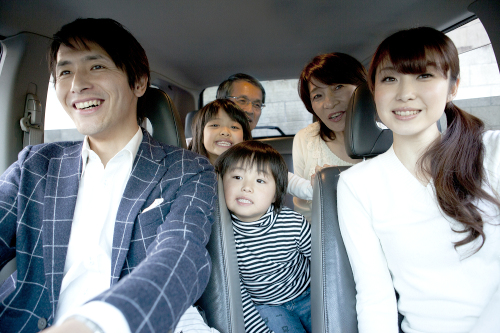

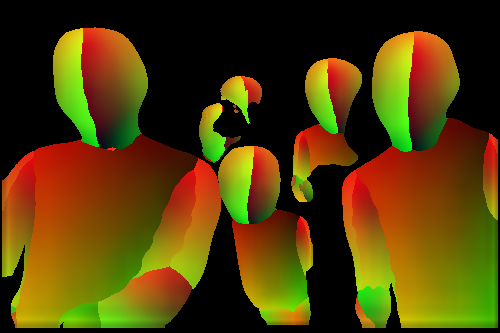

In [38]:
# WEBから画像を取得
%env WEB_IMAGE = https://cdn-image.as-web.jp/2016/09/20125954/011010-764x510.jpg
%env WEB_IMAGE = https://www.aviationwire.jp/wp-content/uploads/2018/06/180606_b0315_hj-640.jpg
%env WEB_IMAGE = https://images-na.ssl-images-amazon.com/images/I/61b151Q6PcL._SX342_.jpg
%env WEB_IMAGE = https://images-na.ssl-images-amazon.com/images/I/51ZyXmFJvlL._SY450_.jpg
%env WEB_IMAGE = http://img.phoenix.webcrew.co.jp/4160/cont_images/facet_content_cn/97/column-20151225-1.jpg
#%env WEB_IMAGE = https://www.1242.com/lf/asset/uploads/2016/06/10000000000000030461_20160610080939055351_P1605210001191.jpg
#%env WEB_IMAGE =   https://romeci.net/wp-content/uploads/2018/12/CapD20181223.jpg
#%env WEB_IMAGE =   http://line.blogimg.jp/taketo_official/imgs/2/b/2b8dc4b9.jpg
#%env WEB_IMAGE = https://entert.jyuusya-yoshiko.com/wp-content/uploads/2018/03/6259bc81dd16d803837c7b01c00c661b.jpg
# WEBから取得した画像のdensepose処理
!wget $WEB_IMAGE -O DensePoseData/demo_data/webimage.jpg 
!python tools/infer_simple.py \
    --cfg configs/DensePose_ResNet101_FPN_s1x-e2e.yaml \
    --output-dir DensePoseData/infer_out/ \
    --image-ext jpg \
    --wts https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl \
    DensePoseData/demo_data/webimage.jpg
from IPython.display import Image,display_png,display_jpeg
display_jpeg(Image('DensePoseData/demo_data/webimage.jpg'))
display_png(Image('DensePoseData/infer_out/webimage_IUV.png'))